# Polarized Light (by Python)

#### import packages

In [1]:
import numpy as np
π = np.pi

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# packages for animation and interaction in Jupyter notebook
from IPython.display import HTML
from ipywidgets import interact
import ipywidgets as widgets

#### define the `polar` function

In [2]:
# create the figure object
fig = plt.figure(); plt.close()
ax = fig.add_subplot(projection='3d')

def polar(t, θ, δA,δC, show_component,show_vector, azimuthal,elevation):
    
    # amplitudes of e/o polarizations
    Ae = np.cos(np.deg2rad(θ))
    Ao = np.sin(np.deg2rad(θ))
    # phase differences
    δA *= π; δC *= π
    δB = δA + δC
    
    xrange = 15
    # components of original wave
    xn = np.arange(-xrange,0,0.1) # negative x of original wave
    en = np.sin(xn - t - δA) * Ae
    on = np.sin(xn - t     ) * Ao
    # components of polarized wave
    xp = np.arange(0, xrange,0.1) # positive x of polarized wave
    ep = np.sin(xp - t - δB) * Ae
    op = np.sin(xp - t     ) * Ao
    length = len(xn)
    
    # define a function to plot frames
    # x,e,o are numbers
    def plotframe(x,e,o, color):
        # plot the frames at the ends of the two waves
        ax.plot([x,x],[-1.5,1.5],[0,0], color='gray', linestyle='dashed', linewidth=1)
        ax.plot([x,x],[0,0],[-1.5,1.5], color='gray', linestyle='dashed', linewidth=1)
        # plot the endpoints of the two waves
        ax.scatter([x],[e],[o], color=color)
    
    # define a function to plot waves
    # x,e,o are arrays
    def plotwave(x,e,o, color):
        # plot wave
        ax.plot(x,e,o, color=color, linewidth=2)
        # plot component waves
        zero = np.zeros(length)
        if show_component:
            ax.plot(x,e,zero, color=color, linestyle='dashed', linewidth=1)
            ax.plot(x,zero,o, color=color, linestyle='dashed', linewidth=1)
        # plot vector field
        if show_vector:
            for i in range(3,length,5):
                ax.plot([x[i],x[i]], [0,e[i]], [0,o[i]], color=color, linewidth=0.5)
    
    # set plot options
    ax.cla()
    ax.grid(False); ax.set_box_aspect((1,1,1))
    ax.set_xlim3d(-xrange,xrange); ax.set_ylim3d(-2,2); ax.set_zlim3d(-2,2)
    ax.set_ylabel('extraordinary'); ax.set_zlabel('ordinary')
    ax.view_init(elevation,azimuthal)
    
    # plot x axis
    ax.plot([-xrange,xrange],[0,0],[0,0], color='gray', linestyle='dashed', linewidth=1)
    # plot original wave
    plotframe(xn[0],en[0],on[0], 'tab:blue')
    plotwave(xn,en,on, 'tab:blue')
    # plot polarizer
    ax.plot([0,0],[-1.5,1.5],[0,0], color='gray', linewidth=1)
    ax.plot([0,0],[0,0],[-1.5,1.5], color='gray', linewidth=1)
    # plot polarized wave
    plotwave(xp,ep,op, 'tab:orange')
    plotframe(xp[-1],ep[-1],op[-1], 'tab:orange')
    
    # return
    return fig

#### plot a static figure

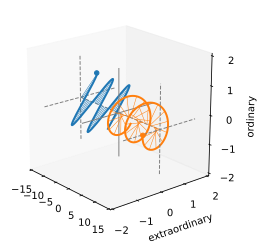

In [3]:
polar(3*π/4, 45, 0,1/2, False,True, -40,20)

#### create an animation

In [ ]:
def update(t):
    polar(t, 45, 0,1/2, False,False, -40,20)
anim = FuncAnimation(fig, update, frames=np.arange(0,2*π,0.1), interval=67)

HTML(anim.to_jshtml()) # create an animation control interface using JavaScript
# anim.save('polar.gif') # export a gif file

#### create an interactive interface

In [ ]:
interact(polar,
    t = widgets.fixed(3*π/4),
    θ = widgets.IntSlider(min=0,max=90,step=15, value=90, description=r"$\theta\ \mathrm{(deg)}$"),
    δA = widgets.FloatSlider(min=-1,max=1,step=1/4, value=0, description=r"$\delta_A\ (\pi)$"),
    δC = widgets.FloatSlider(min=-1,max=1,step=1/4, value=0, description=r"$\delta_C\ (\pi)$"),
    show_component = widgets.Checkbox(value=True, description='show component waves'),
    show_vector    = widgets.Checkbox(value=True, description='show vectors'        ),
    azimuthal = widgets.IntSlider(min=-180,max=180,step=10, value=-40, description='azimuthal'),
    elevation = widgets.IntSlider(min= -90,max= 90,step=10, value= 20, description='elevation')
);